# Ad-hoc Analysis about Sales 2019

Purpose: Answer the questions related to sales 2019:

1.What was the best month for sales? How much was earned that month?

2.What city has the best sales

3.What time should we display ads to maximize the likelihood of customer's buying product?

4.What products are most often sold together?

5.What product was sold the most?


In [46]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import clean data of sales 2019
df = pd.read_csv('sales2019')
# Display dataset with the 3 first rows
df.head(3)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product Category,City,State,Revenue,Month,Hour,DayOfWeek,DayType
0,0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Phone,Boston,Massachusetts,700.00,1,21,Tuesday,Weekday
1,1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Cable,Portland,Oregon,14.95,1,14,Monday,Weekday
2,2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Headphones,San Francisco,California,23.98,1,13,Thursday,Weekday


#### For convenience, Let's define a Class having functions for plotting charts and 3 single Functions for calculating total revenue/ total orders/ total sold quantity across different categories

In [19]:
# Define a class storing functions for plotting charts
# to not repeat code snippets

class plot_chart:
    # initiate a function to get a dataframe name as a arguement
    def __init__(self, dataframe):
        self.df = dataframe
        
    # Define a function to plot vertical bar chart with 3 arguments
    # x_column represents categorical column, x_column represents numerical column, title is the chart name
    def vertical_bar(self, x_column, y_column, title):
        import matplotlib.ticker as ticker
        plt.figure(figsize=(4,3))
        plt.bar(self.df[x_column], self.df[y_column])
        plt.axhline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=60)
        formatter = ticker.StrMethodFormatter('{x:,.0f}')
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def horizontal_bar(self, x_column, y_column, title):
        plt.figure(figsize=(4,4))
        plt.barh(self.df[x_column], self.df[y_column])
        plt.axvline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.ylabel(x_column)
        plt.xlabel(y_column)
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def pie(self, x_column, y_column, title):
        plt.figure(figsize=(4, 4))
        plt.pie(self.df[y_column], labels=self.df[x_column], autopct='%1.1f%%')
        plt.title(title)
        plt.axis('equal')
        plt.show()
    
    # Define a function to plot line chart
    def line(self, x_column, y_column, title):
        plt.figure(figsize=(6, 4))
        plt.plot(self.df[x_column], self.df[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.grid(True)
        plt.show()

In [20]:
# Define 3 functions for calculating total revenue/orders/sold quantity across different catgories

def calculate_revenue(categorical_col):
    result1 = df.groupby(categorical_col)['Revenue'].sum().reset_index()
    return result1


def calculate_orders(categorical_col):
    result2 = df.groupby(categorical_col)['Order ID'].count().reset_index()
    return result2


def calculate_items(categorical_col):
    result3 = df.groupby(categorical_col)['Quantity Ordered'].sum().reset_index()
    return result3

### 1.What was the best month for sales? How much was earned that month?

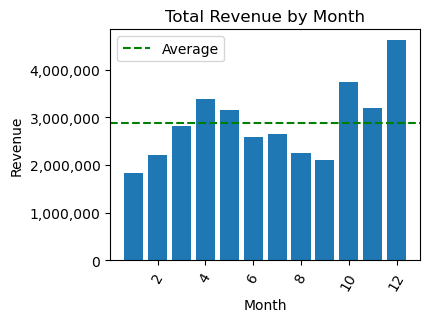

Answer: The best month for sales is 12 with the revenue of 4613443.34 dollars


In [47]:
# Group the data by month and calculate total revenue for each month by using the functions defined
monthly_revenue = calculate_revenue('Month')

# Plot the chart by using the Class defined
plot_chart(monthly_revenue).vertical_bar('Month','Revenue','Total Revenue by Month')

# Find the best month for sales and its revenue 
best_month = monthly_revenue.loc[monthly_revenue['Revenue'] == monthly_revenue['Revenue'].max()]

# Print the answer
print(f'Answer: The best month for sales is {best_month.iloc[0,0]} with the revenue of {best_month.iloc[0,1]} dollars')

### 2.What city has the best sales?

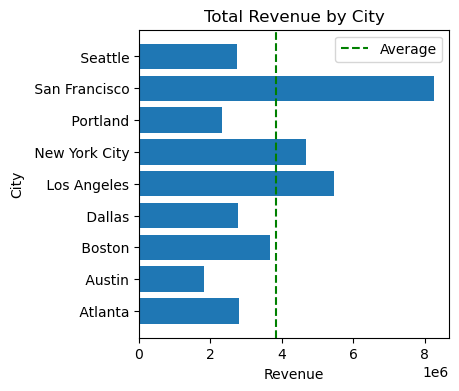

Answer: The best city for sales is  San Francisco with the revenue of 8262203.91 dollars


In [49]:
# Group the data by city and calculate total revenue for each city, by using the functions defined
city_revenue = calculate_revenue('City')

# Plot the chart by using the Class defined
plot_chart(city_revenue).horizontal_bar('City','Revenue','Total Revenue by City')

# Find the best city for sales and its revenue 
best_city = city_revenue.loc[city_revenue['Revenue'] == city_revenue['Revenue'].max()]

# Print the answer
print(f'Answer: The best city for sales is {best_city.iloc[0,0]} with the revenue of {best_city.iloc[0,1]} dollars')

### 3.What time should we display ads to maximize the likelihood of customer's buying product?

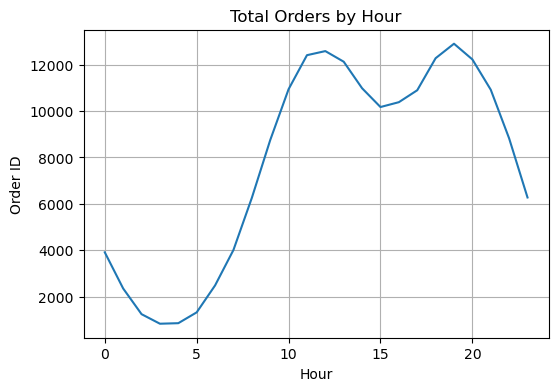

In [23]:
# Group the data by hour and calculate total orders for per hour, by using the functions defined
hourly_revenue = calculate_orders('Hour')

# Plot the chart by using the Class defined
plot_chart(hourly_revenue).line('Hour','Order ID','Total Orders by Hour')

### However, Thời gian mua hàng của mỗi thành phố khác nhau, nên tập trung optimize lượng orders của thị trường chính sẽ tốt hơn.

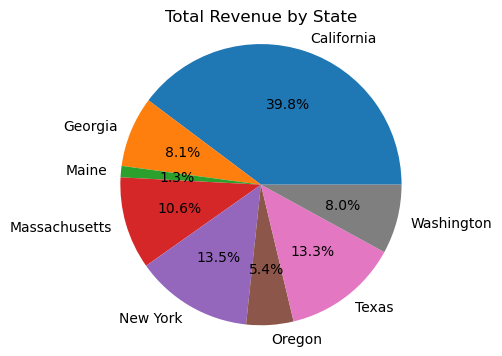

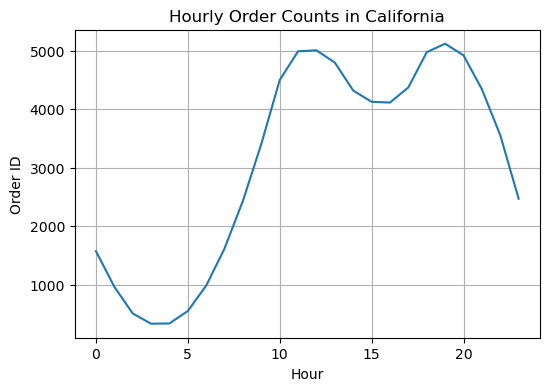

In [50]:
# Find the Primary Market which had the best revenue in 2019: 

# Group the data by state and calculate total revenue for each state, by using the functions defined
state_revenue = calculate_revenue('State')

# Plot the chart by using the Class defined
plot_chart(state_revenue).pie('State','Revenue','Total Revenue by State')

# Get the name of primary market
PrimaryMarket_name = state_revenue[state_revenue['Revenue'] == state_revenue['Revenue'].max()].iloc[0,0]

# Filter the sales data related to primary market
PrimaryMarket_df = df.loc[df['State']== PrimaryMarket_name]

# Find the peak hours when customers in the main market purchased products
PrimaryMarket_HourlyOrder = PrimaryMarket_df.groupby('Hour')['Order ID'].count().reset_index()

# Plot the chart to show hourly orders in the Primary Market
plot_chart(PrimaryMarket_HourlyOrder).line('Hour', 'Order ID', f'Hourly Order Counts in {PrimaryMarket_name}')


### 4.What products are most often sold together?

In [39]:
# Filter duplicated values in Order ID column 
duplicated_orderID = df[df.duplicated('Order ID', keep=False)] 

# Group by Order ID and combine the Product values into a single row
grouped_data = duplicated_orderID.groupby('Order ID')['Product'].apply(', '.join).reset_index()

# Display top 10 product pairs sold together
grouped_data['Product'].value_counts().head(10)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Product, dtype: int64

### 5.What product was sold the most?


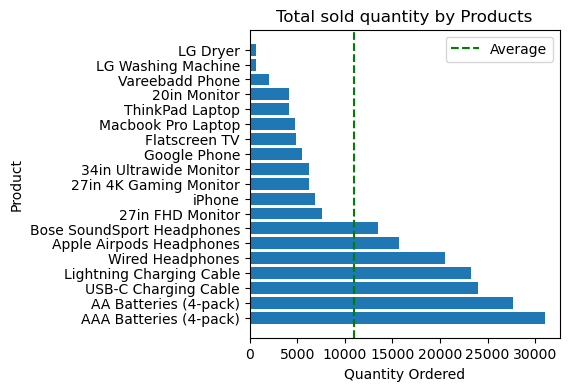

In [51]:
# Group by the products and calculate their total sold quantity, by using the functions defined
prod_quantity = calculate_items('Product').sort_values('Quantity Ordered', ascending= False)

# Plot the chart by using the Class defined
plot_chart(prod_quantity).horizontal_bar('Product','Quantity Ordered', 'Total sold quantity by Products')